## Data augmentations

Since the images are of different sizes, we need to resize and augment them well. In this notebook we look at the various augmentations available and decide the best values for our dataset

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
tfms = get_transforms(max_rotate=25)

In [3]:
def get_ex(): return open_image('../input/b-images/b_image.png')

In [4]:
# default transforms
def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

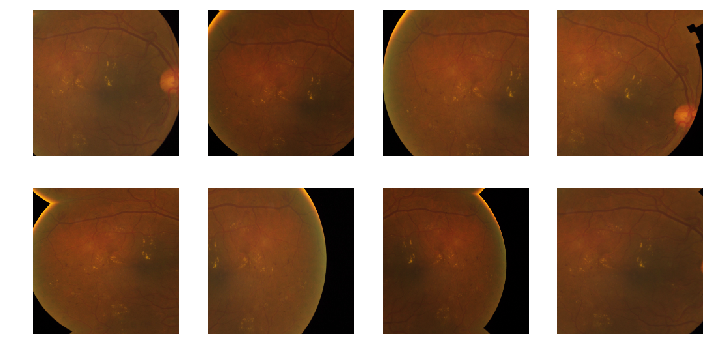

In [5]:
plots_f(2, 4, 12, 6, size=224)

In [6]:
# random zoom and crop
tfms = zoom_crop(scale=(0.75,2), do_rand=True)

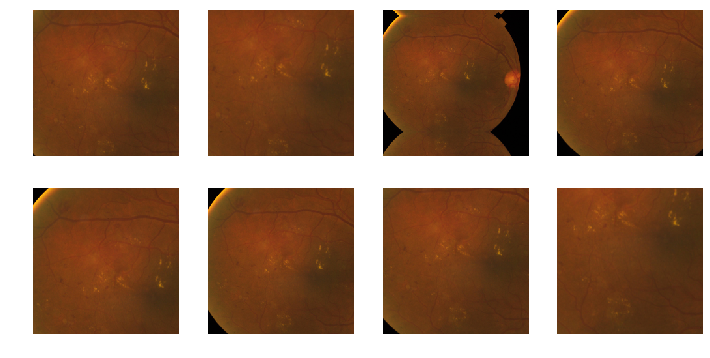

In [7]:
plots_f(2, 4, 12, 6, size=224)

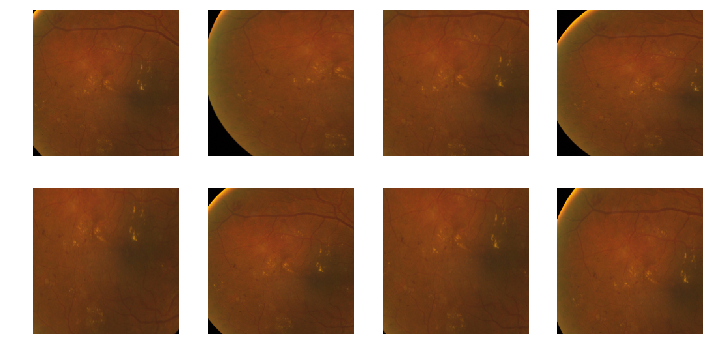

In [8]:
# random resize and crop
tfms = [rand_resize_crop(224)]
plots_f(2, 4, 12, 6, size=224)

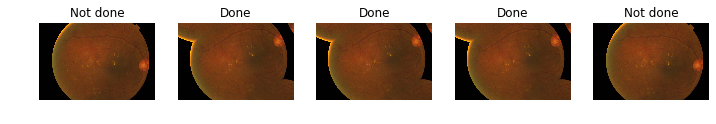

In [9]:
# rotation using probability
tfm = [rotate(degrees=30, p=0.5)]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    img = get_ex().apply_tfms(tfm)
    title = 'Done' if tfm[0].do_run else 'Not done'
    img.show(ax=ax, title=title)

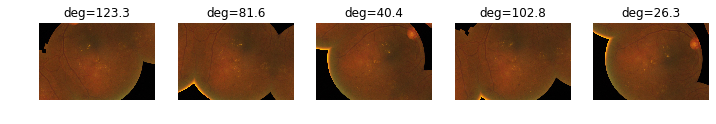

In [10]:
# rotation using degree range
tfm = [rotate(degrees=(0,180))]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    img = get_ex().apply_tfms(tfm)
    title = f"deg={tfm[0].resolved['degrees']:.1f}"
    img.show(ax=ax, title=title)

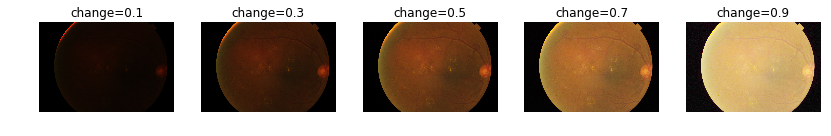

In [11]:
# brightness
fig, axs = plt.subplots(1,5,figsize=(14,8))
for change, ax in zip(np.linspace(0.1,0.9,5), axs):
    brightness(get_ex(), change).show(ax=ax, title=f'change={change:.1f}')

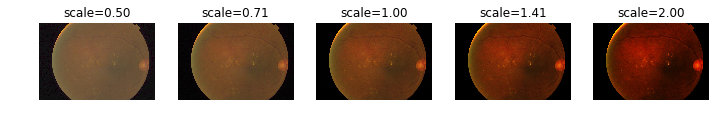

In [12]:
# contrast
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.exp(np.linspace(log(0.5),log(2),5)), axs):
    contrast(get_ex(), scale).show(ax=ax, title=f'scale={scale:.2f}')

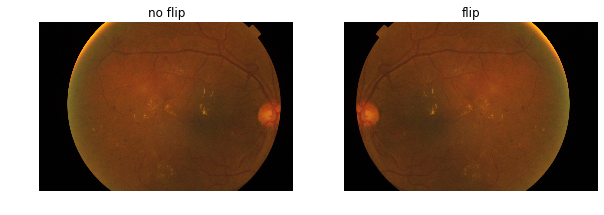

In [13]:
# flips
fig, axs = plt.subplots(1,2,figsize=(10,8))
get_ex().show(ax=axs[0], title=f'no flip')
flip_lr(get_ex()).show(ax=axs[1], title=f'flip')

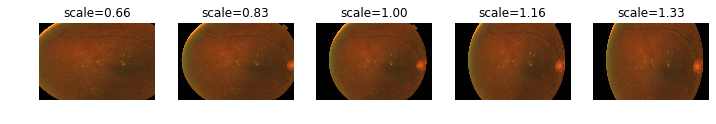

In [14]:
# squinch, this will be used for resizing so that we don't
# lose the original image
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.linspace(0.66,1.33,5), axs):
    get_ex().squish(scale=scale).show(ax=ax, title=f'scale={scale:.2f}')

In [15]:
path = Path('../input/aptos2019-blindness-detection/')

In [16]:
path.ls()

[PosixPath('../input/aptos2019-blindness-detection/train.csv'),
 PosixPath('../input/aptos2019-blindness-detection/sample_submission.csv'),
 PosixPath('../input/aptos2019-blindness-detection/test.csv'),
 PosixPath('../input/aptos2019-blindness-detection/train_images'),
 PosixPath('../input/aptos2019-blindness-detection/test_images')]

In [17]:
df = pd.read_csv(path/'train.csv')
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [18]:
# ??get_transforms

In [19]:
src = (
    ImageList.from_df(df,path,folder='train_images',suffix='.png')
        .split_by_rand_pct(0.1, seed=42)
        .label_from_df()
    )

In [20]:
tfms = get_transforms(max_warp=0, max_zoom=1.1, max_lighting=0.1, p_lighting=0.1)

In [21]:
data = (
    src.transform(tfms,size=128, resize_method=ResizeMethod.SQUISH,padding_mode='zeros')
    .databunch()
    .normalize(imagenet_stats)
)

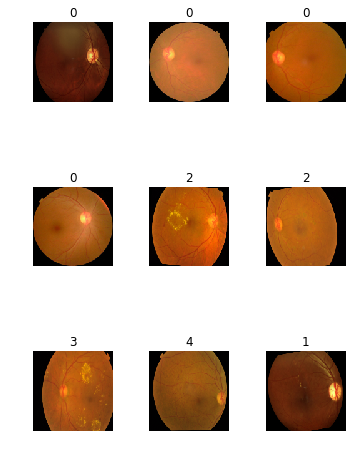

In [22]:
data.show_batch(rows=3, figsize=(5,7))